# Bilinear Filtering

카메라를 정육면체 중 하나에 가장 가깝게 위치시켰을 때

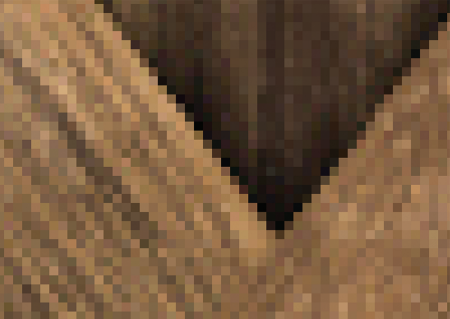

이미지는 blocky 하게 표현된다. 그 이유는 nearest neighgbor filtering 기술 때문인데, 이 기술은 texel 좌표는 정수 인덱스를 가진 픽셀 배열이기 때문에 tx를 반올림하여 나타내는 것을 의미한다.

따라서, tx와 ty 좌표를 반올림하는 대신 4개의 정수 texel 좌표 사이의 위치를 설명하는 것으로 분수 texel 좌표(tx, ty)를 해석한다면 위와 같은 현상을 해결할 수 있다.

주변 정수 texel들에 네 가지 색을 취해서 분수 texel에 대해 선형적으로 보간된 색상을 계산할 수 있다.

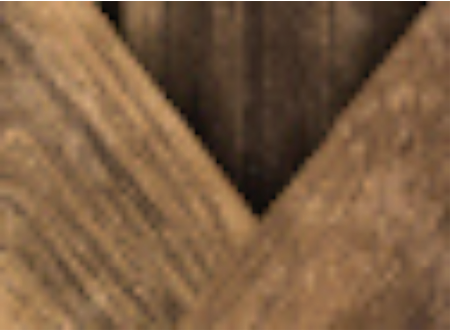

주변의 네 픽셀을 TL, TR, BL, BR 이라 부르기로 결정하고 tx와 ty의 분수 부분을 fx와 fy라고 부를 때 다음과 같이 표현할 수 있다. (tx와 ty)에 의해 묘사된 정확한 위치인 C와 정수 좌표에서 texel에 둘러싸인 위치를 보여준다.

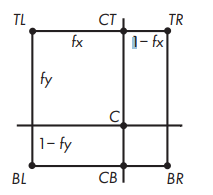

다음은 그 과정을 계산 수식으로 정리한 내용이다.

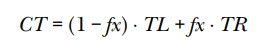

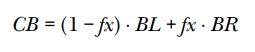

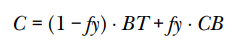

수도 코드 상에서는 GetTexel(texture, tx, ty) 함수를 받아와서 사용하는데 앞쪽에서 정의된 tx와 ty 좌표를 받아오고, 위 수식를 첨가해서 함수를 만들어 추후에 구현할 예정이다.

이 기술을 bilinear filtering 이라고 표현한다.

# Mipmapping

mipmapping 은 렌더링 속도를 향상시키기 위한 목적으로 기본 텍스쳐와 이를 연속적으로 미리 축소시킨 텍스쳐들로 이루어진 비트맵 이미지의 집합이다.

텍스쳐가 원래 크기 이상으로 보일 경우 기본 텍스쳐를 그대로 쓸 수도 있지만, 원래보다 멀거나 작게 보일 경우 축소된 텍스쳐를 렌더링에 대신 사용한다.

이렇게 하면 렌더링에 사용되는 텍스쳐 픽셀의 수가 훨씬 줄어들기 때문에 렌더링 속도를 높일 수 있다. 또한 포함된 텍스쳐 이미지들은 안티 엘리어싱 처리가 되어 있기 때문에 렌더링 과정에서 일어날 수 있는 손실도 줄고 실시간 렌더링의 부하도 줄일 수 있다.

다음에 나올 사진은 컴퓨터 그래픽스에서 적용되는 기존 랜더링의 간단한 오류 예시이다.

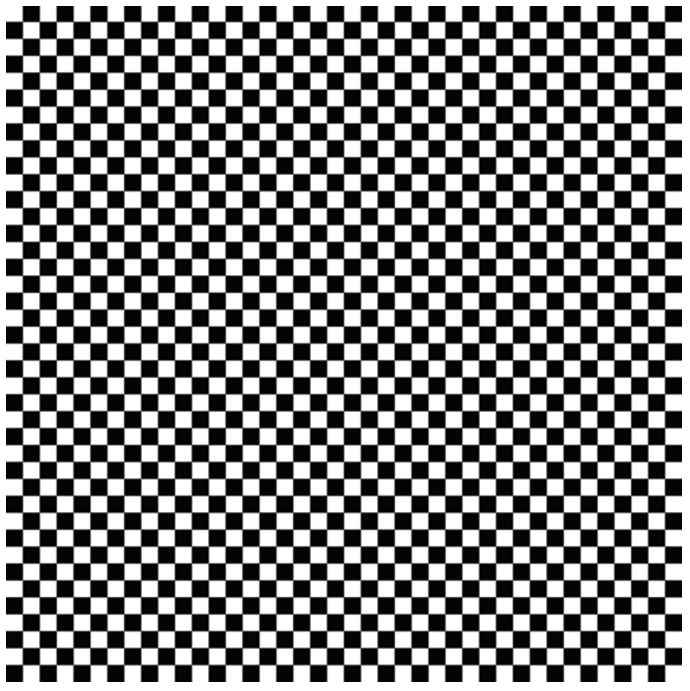

이런 패턴 무늬가 있을 때 mipmapping 처리가 된다면 회색이 나올 것으로 예상되지만 운이 나쁠 경우 검은색 혹은 흰색이 나올 수도 있다.

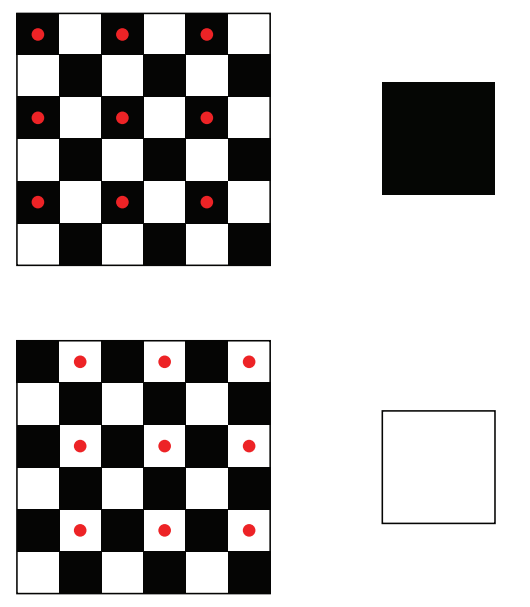

이런 문제의 해결방법은 텍스쳐의 2 x 2 texel 영역의 평균 색상을 계산하여 픽셀에 사용하는 것이다. 흑백화소를 평균화하면 필요한 회색이 나올 것이다.

그러나 계산 과정이 매우 오래걸릴 수 있다. 10 x 10 texel 면적만 잡아도 평균 100 픽셀을 계산해야 하기 때문이다.

그렇기 때문에 mipmapping 을 활용하여 해결한다. 예를 들어 기본 텍스쳐가 256 x 256 픽셀이라고 할 때, mipmap 집합은 이전 이미지의 각 1/4 씩 되는 이미지로 저장하여, 즉 128 x 128, 64 x 64, 32 x 32, 16 x 16, 8 x 8, 4 x 4, 2 x 2, 1 x 1 이렇게 8개의 이미지를 저장한다.

만약 텍스쳐를 40 x 40 크기로 렌더링 할 경우 64 x 64 와 32 x 32 크기 밉맵 이미지를 적절하게 interpolate 하여 최종 이미지를 얻는다. 위의 경우 10배에 해당하는 이미지가 필요하다면, 16과 8 사이로 보간하여 해결하면 된다.

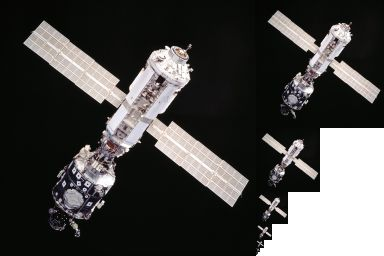

이런 mipmap 은 기존에 필요한 용량보다 더 많은 이미지를 저장하기 때문에 용량이 조금 더 필요하다.

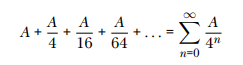

무한 등비 수열 급수의 합을 계산하면 총 4/3 의 공간 즉, 추가적으로는 1/3 에 해당하는 공간만큼 더 필요한 셈이다.